In [ ]:
from google.colab import drive #import your data
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/Dataset_Vehicle/Vehicle_fuel_efficiency.csv

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Dataset_Vehicle/Vehicle_fuel_efficiency.csv")

In [ ]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.shape

(398, 9)

In [ ]:
data.dropna(inplace=True)
#its better to replace the null value than to drop  ()if less than 2% delete)

In [ ]:
data.shape

(398, 9)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

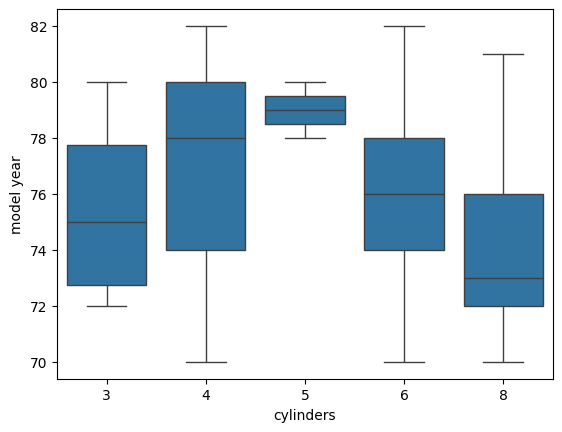

In [ ]:
sns.boxplot(data=data, x="cylinders", y= "model year", )
plt.show()

<Axes: xlabel='count', ylabel='horsepower'>

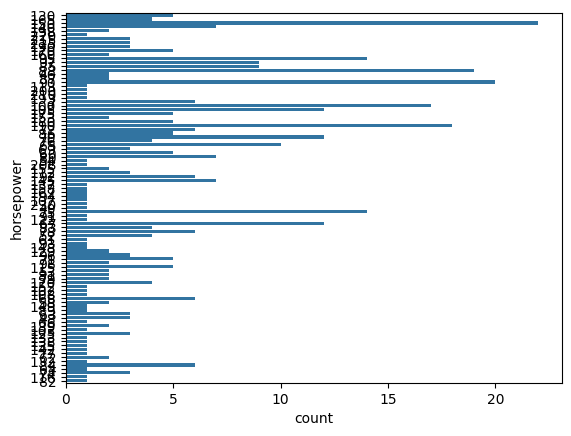

In [ ]:
sns.countplot(data["horsepower"])

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [ ]:
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

/tmp/ipython-input-3115432215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


In [ ]:
print(data.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


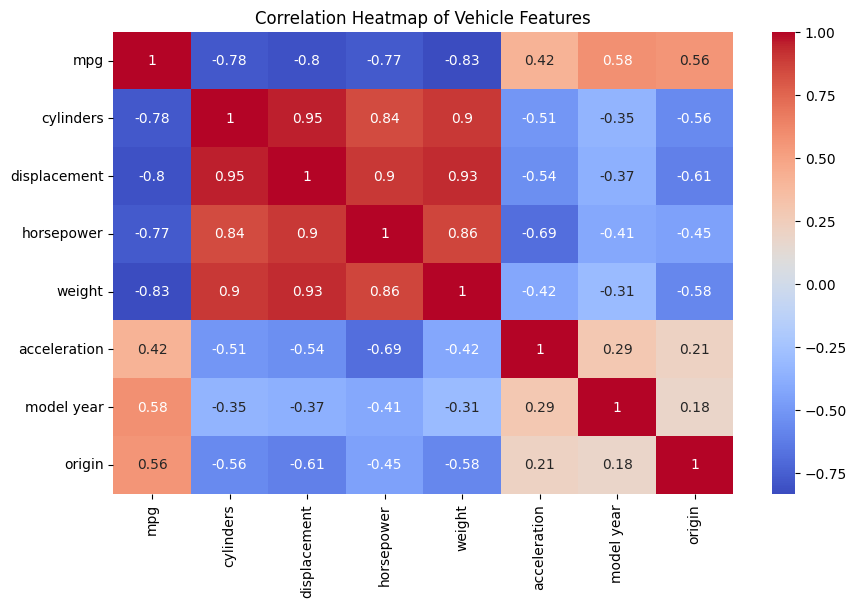

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm",)
plt.title("Correlation Heatmap of Vehicle Features")
plt.show()
#Strongly negatively correlated with:
#MPG
#cylinders (-0.78)
#displacement (-0.80)
#horsepower (-0.77)
#weight (-0.83)

# Acceleration
# Negatively correlated with power/weight features:
# horsepower (-0.69)
# weight (-0.42)

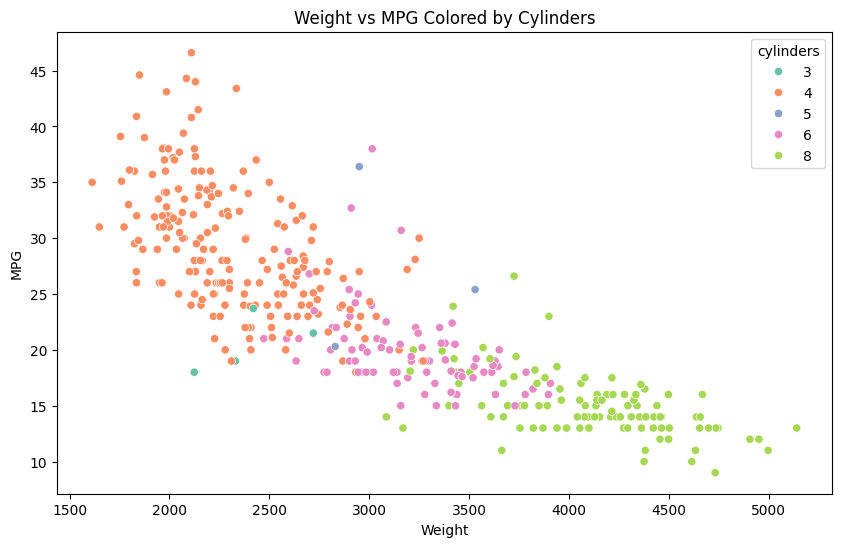

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="weight", y="mpg", hue="cylinders", palette="Set2",)
plt.title("Weight vs MPG Colored by Cylinders")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()


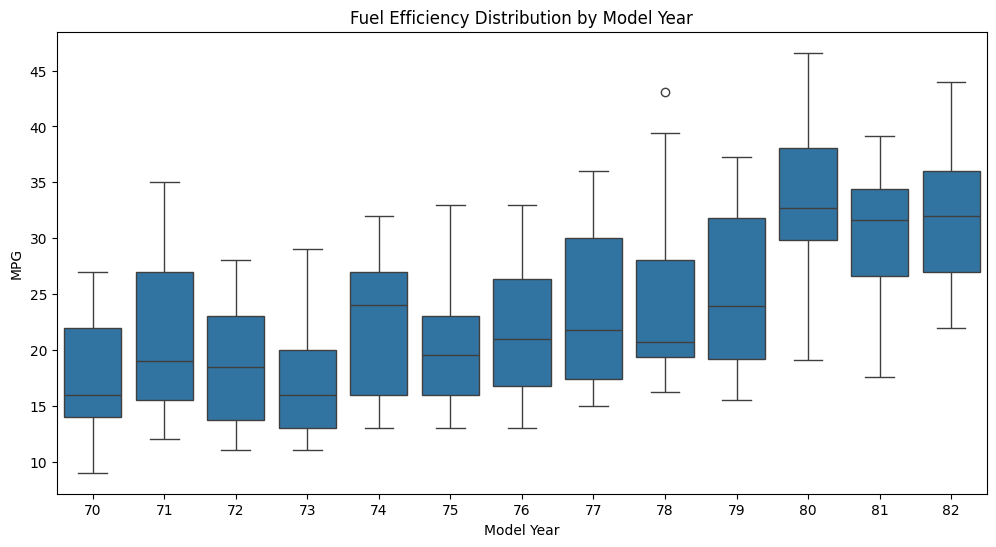

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="model year", y="mpg")
plt.title("Fuel Efficiency Distribution by Model Year")
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()


Text(0, 0.5, 'Count')

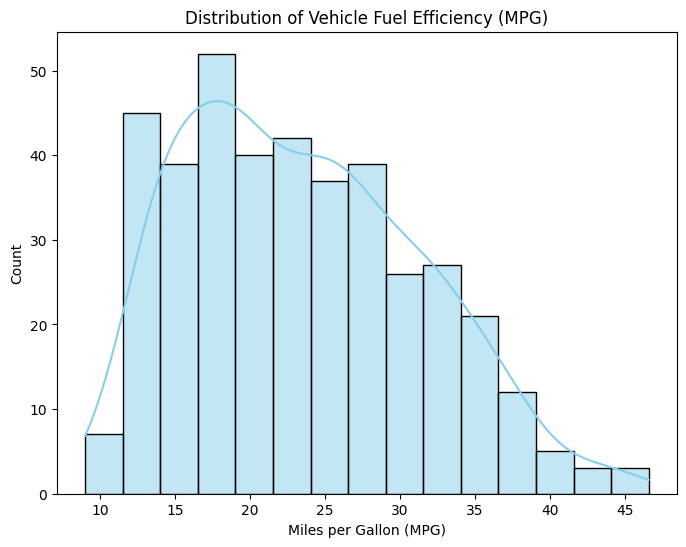

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['mpg'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Vehicle Fuel Efficiency (MPG)")
plt.xlabel("Miles per Gallon (MPG)")
plt.ylabel("Count")
#if the plot is skewed to left/right the ML model will have problem for justification (eg of 80 males and 20 females subject) if -ve use power if +ve use square root

/tmp/ipython-input-1449918389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="cylinders", y="horsepower", palette="Set2")


Text(0.5, 1.0, 'Horsepower Distribution by Cylinders')

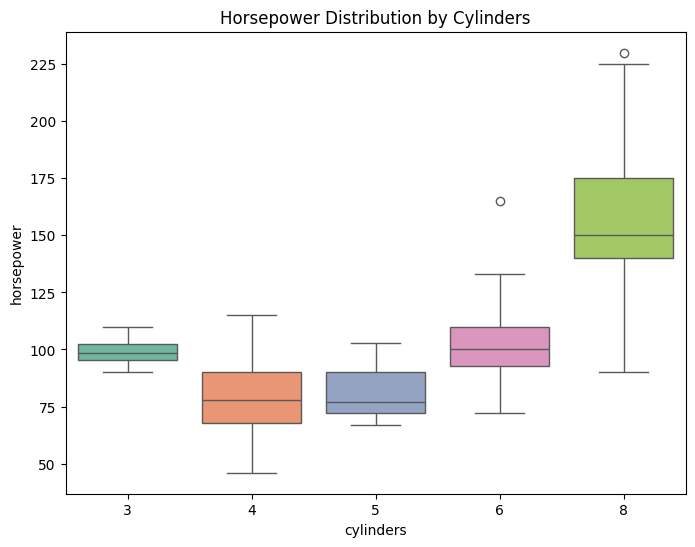

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x="cylinders", y="horsepower", palette="Set2")
plt.title("Horsepower Distribution by Cylinders")


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data["mpg"]= le.fit_transform(data['mpg'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(["mpg", "car name"], axis = 1)
y = data["mpg"]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  11.345305600518945
MSE is  192.56492506019748
R2 is  0.8259997833657854


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred_dtr=dtr.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2 = r2_score(y_test,y_pred_dtr)

print("MAE is ",mae)
print("MSE is ",mse)
print("Accuracy is ",r2)

MAE is  11.8375
MSE is  315.9625
Accuracy is  0.7144986636008528


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

y_pred_rfr=rfr.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_rfr)
mse=mean_squared_error(y_test,y_pred_rfr)
r2 = r2_score(y_test,y_pred_rfr)

print("MAE is ",mae)
print("MSE is ",mse)
print("Accuracy is ",r2)

MAE is  6.891374999999999
MSE is  94.38560625000001
Accuracy is  0.9147138767378448


In [ ]:
features = x_train.columns
importances = rfr.feature_importances_
fea_imp= pd.DataFrame({"Feature":features,"Importance":importances})

In [ ]:
fea_imp.head()

,Feature,Importance
0,cylinders,0.146400
1,displacement,0.402682
2,horsepower,0.114252
3,weight,0.177226
4,acceleration,0.025986


In [ ]:
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [ ]:
fea_imp.head()

,Feature,Importance
1,displacement,0.402682
3,weight,0.177226
0,cylinders,0.146400
5,model year,0.127260
2,horsepower,0.114252


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

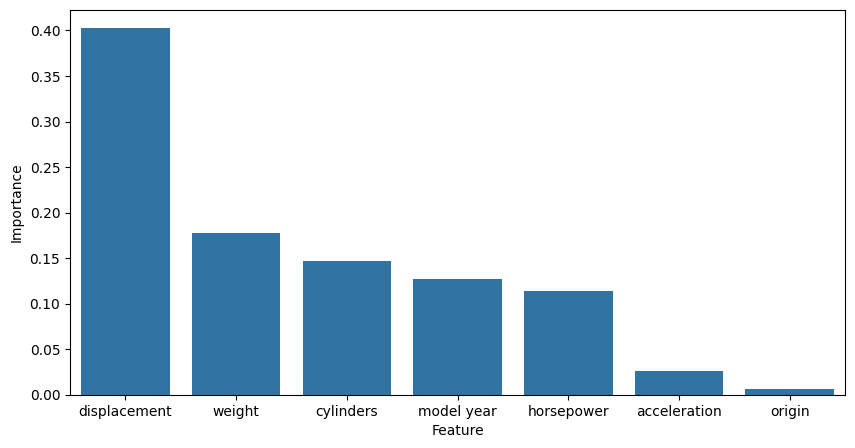

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=fea_imp,x="Feature",y="Importance")
plt.show()

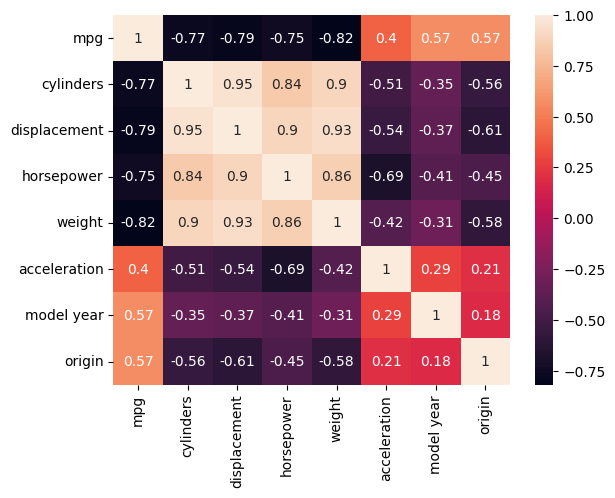

In [ ]:
# Drop the 'car name' column before calculating correlation
data_numeric = data.drop("car name", axis=1)
sns.heatmap(data_numeric.corr(numeric_only=True), annot=True)
plt.show()